## Synthetic Recommender Systems Datasets

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import truncnorm

In [2]:
# generate random integer data between low and upp, following a gaussian distribution (mean, sd) 
def get_truncated_normal(mean=0, sd=1, low=1, upp=5, size=1):
    return np.rint(truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd).rvs(size))

In [3]:
def plot_items(data, ids_female):
    items_votes_male = data.item[~data.user.isin(ids_female)].value_counts()
    items_votes_male.sort_index(inplace=True)
    items_votes_female = data.item[data.user.isin(ids_female)].value_counts()
    items_votes_female.sort_index(inplace=True)
    
    plt.title('item votes distribution')
    plt.xlabel("#items")
    plt.bar(items_votes_male.index, items_votes_male.values, width=1, color="blue", label='male')
    plt.bar(items_votes_female.index, items_votes_female.values, width=1, color="orange", alpha=0.6, label='female')
    plt.ylabel("#votes")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.grid(True, axis="y")
    plt.tight_layout() 
    plt.show()

In [4]:
def plot_ratings(data, ids_female):
    rating_votes_male = data.rating[~data.user.isin(ids_female)].value_counts()
    rating_votes_male.sort_index(inplace=True)
    rating_votes_male_norm = (rating_votes_male*100)/rating_votes_male.sum()
    rating_votes_female = data.rating[data.user.isin(ids_female)].value_counts()
    rating_votes_female.sort_index(inplace=True)
    rating_votes_female_norm = (rating_votes_female*100)/rating_votes_female.sum()

    plt.title("Rating distribution")
    plt.xlabel("rating")
    plt.ylabel("%rating")
    x_index = rating_votes_male_norm.index.values
    plt.bar(x_index-0.2, rating_votes_male_norm.values, width=0.4, color="orange", label='male')
    plt.bar(x_index+0.2, rating_votes_female_norm.values, width=0.4, color="blue", label='female')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True, axis="y")
    plt.show()

In [5]:
def generate_ids(num_male, num_female):
    ids = range(1,num_male+num_female+1)
    ids_female = sample(ids,num_female)
    ids_male = list(np.setdiff1d(ids, ids_female, True))
    return ids_male, ids_female


In [6]:
def generate_df_ids(ids_male, ids_female):
    ids = np.concatenate((ids_male, ids_female))
    frame = {'user': ids, 'gender': np.tile(0, len(ids))}
    data = pd.DataFrame(frame, dtype=int)
    data.gender[data.user.isin(ids_female)] = 1
    data.sort_values(by=['user'], ignore_index=True, inplace=True)
    return data


In [7]:
def generate_csv(data, filename):
    data.to_csv(filename, index=False)


In [8]:
def generate_fake(mean_male, sd_male, low_male, upp_male,
                mean_female, sd_female, low_female, upp_female):
    
    # random number of votes casted for each male user
    votes_per_male_user = np.random.randint(num_min_votes, num_max_votes, num_male)
    # total number of votes casted for each male user
    num_male_votes = sum(votes_per_male_user)
    # casted votes following a Gaussian distribution
    random_male_ratings = get_truncated_normal(mean=3, sd=1, size=num_male_votes)
    # casted votes for male users following a Gaussian distribution (mean, sd)
    random_male_items = get_truncated_normal(mean=mean_male,
                                             sd=sd_male,
                                             low=low_male,
                                             upp=upp_male,
                                             size=num_male_votes)
    
    # votes list
    male_votes = []   
    for userid, votes in zip(ids_male, votes_per_male_user):
        male_votes.append(np.tile(userid, votes))
    male_votes = list(itertools.chain.from_iterable(male_votes))
    
    # random number of votes casted for each female user
    votes_per_female_user = np.random.randint(num_min_votes, num_max_votes, num_female)
    # total number of votes casted for each female user
    num_female_votes = sum(votes_per_female_user)
    # casted votes following a Gaussian distribution
    random_female_ratings = get_truncated_normal(mean=3, sd=1, size=num_female_votes)
    # casted votes for male users following a Gaussian distribution (mean, sd)
    random_female_items = get_truncated_normal(mean=mean_female,
                                             sd=sd_female,
                                             low=low_female,
                                             upp=upp_female,
                                             size=num_female_votes)

    # votes list
    female_votes = []   
    for userid, votes in zip(ids_female, votes_per_female_user):
        female_votes.append(np.tile(userid, votes))
    female_votes = list(itertools.chain.from_iterable(female_votes))

    # dataframe fake generation
    frame = {'user': np.concatenate((male_votes, female_votes)),
             'item': np.concatenate((random_male_items, random_female_items)),
             'rating': np.concatenate((random_male_ratings, random_female_ratings))}
    data = pd.DataFrame(frame, dtype=int)
    data.sort_values(by=['user'], ignore_index=True, inplace=True)
    return data


### Parámetros generales

In [9]:
num_items  = 1000
num_male   = 1500
num_female = 300
num_min_votes = 20
num_max_votes = 120

ids_male, ids_female = generate_ids(num_male, num_female)
gender = generate_df_ids(ids_male, ids_female)
generate_csv(gender, 'gender.txt')

### male/female balanced distribution

In [10]:
data = generate_fake(mean_male=500, sd_male=200, low_male=1, upp_male=1000,
                   mean_female=500, sd_female=200, low_female=1, upp_female=1000)

In [11]:
generate_csv(data, 'synthetic_100.txt')

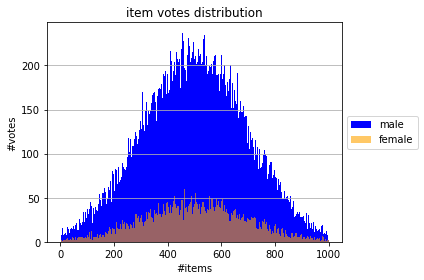

In [12]:
plot_items(data, ids_female)

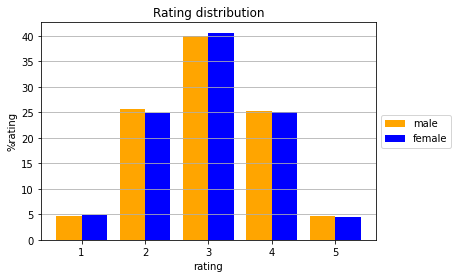

In [13]:
plot_ratings(data, ids_female)

### male/female 80% distribution

In [14]:
data = generate_fake(mean_male=400, sd_male=140, low_male=1, upp_male=800,
                   mean_female=580, sd_female=200, low_female=160, upp_female=1000)

In [15]:
generate_csv(data, 'synthetic_80.txt')

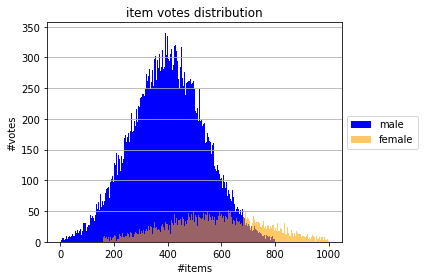

In [16]:
plot_items(data, ids_female)

### male/female 60% distribution

In [17]:
data = generate_fake(mean_male=350, sd_male=140, low_male=1, upp_male=800,
                   mean_female=660, sd_female=140, low_female=320, upp_female=1000)

In [18]:
generate_csv(data, 'synthetic_60.txt')

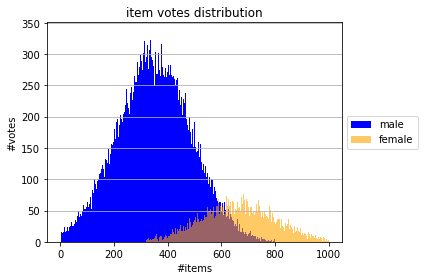

In [19]:
plot_items(data, ids_female)

### male/female 40% distribution

In [20]:
data = generate_fake(mean_male=350, sd_male=140, low_male=1, upp_male=800,
                   mean_female=740, sd_female=80, low_female=480, upp_female=1000)

In [21]:
generate_csv(data, 'synthetic_40.txt')

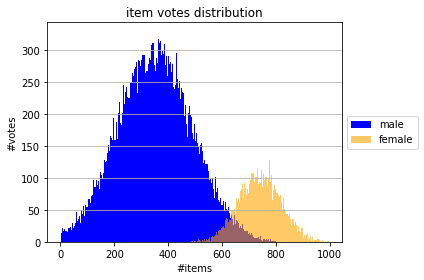

In [22]:
plot_items(data, ids_female)

### male/female 20% distribution

In [26]:
data = generate_fake(mean_male=350, sd_male=140, low_male=1, upp_male=800, 
                   mean_female=820, sd_female=20, low_female=640, upp_female=1000)

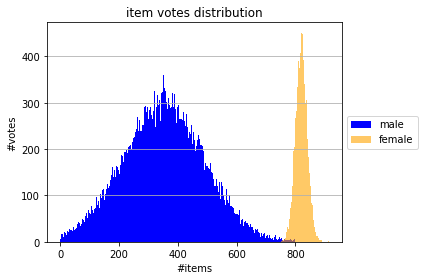

In [28]:
generate_csv(data, 'synthetic_20.txt')
plot_items(data, ids_female)

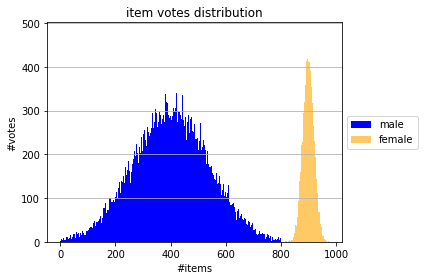

In [25]:
data = generate_fake(mean_male=400, sd_male=140, low_male=1, upp_male=800,
                   mean_female=900, sd_female=20, low_female=801, upp_female=1000)
generate_csv(data, 'synthetic_00.txt')
plot_items(data, ids_female)